# Unsupervised Learning_R4_Project1_Car mpg

# Identify optimal number of clusters in the data and apply Linear Regression model to predict car mpg.

### Import Python Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="darkgrid", color_codes=True)

from scipy.stats import zscore
from scipy.spatial.distance import cdist

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Problem Statement :
## Identify and separate optimal number of clusters in the data using K-means clustering and apply Linear Regression model on each cluster to predict the city-cycle fuel consumption in miles per gallon .

## About the Data:

   __Car city-cycle fuel consumption in miles per gallon.__

    The dataset was used in the 1983 American Statistical Association Exposition.The number of Instances are 398 and the number of Attributes are 8 including the car name attribute.The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 5 continuous variables.The car name is a string attribute and is unique for each instance.

### Load Data and read the data as a data frame

In [2]:
car_df = pd.read_csv("cars-dataset.csv")

### Shape of the data

In [3]:
car_df.shape

(398, 8)

### Data type of each attribute

In [4]:
car_df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

### Check that data is read correctly using head, tail and sample

In [5]:
car_df.head(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [6]:
car_df.tail(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
393,ford mustang gl,4,140.0,86,2790,15.6,82,27.0
394,vw pickup,4,97.0,52,2130,24.6,82,44.0
395,dodge rampage,4,135.0,84,2295,11.6,82,32.0
396,ford ranger,4,120.0,79,2625,18.6,82,28.0
397,chevy s-10,4,119.0,82,2720,19.4,82,31.0


In [7]:
car_df.sample(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
60,chevrolet vega,4,140.0,90,2408,19.5,72,20.0
234,pontiac sunbird coupe,4,151.0,88,2740,16.0,77,24.5
152,plymouth valiant custom,6,225.0,95,3264,16.0,75,19.0
139,ford gran torino (sw),8,302.0,140,4638,16.0,74,14.0
18,datsun pl510,4,97.0,88,2130,14.5,70,27.0
290,ford country squire (sw),8,351.0,142,4054,14.3,79,15.5
381,honda accord,4,107.0,75,2205,14.5,82,36.0
386,buick century limited,6,181.0,110,2945,16.4,82,25.0
179,volvo 244dl,4,121.0,98,2945,14.5,75,22.0
132,chevrolet vega,4,140.0,75,2542,17.0,74,25.0


### Info on column name, count of records, not-null/null, datatype, count of datatypes and memory usage of columns

In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


### Features

In [9]:
print(car_df.dtypes)

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object


#### Description of Features
- __car Name__ Name of the car.Unique name for each record.
- __cyl__	 No of cylinders in the car – Multivalued discrete variable
- __disp__   Displacement – continuous variable
- __hp__	 Horsepower – continuous variable
- __wt__	 Weight – continuous variable
- __acc__	 Acceleration – continuous variable
- __yr__	 Model of the car – Multivalued discrete variable
- __mpg__    Miles per gallon - continuous variable

### Null Values

In [10]:
car_df.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [11]:
print("\nThere are no Null/Missing values in the dataset\n")


There are no Null/Missing values in the dataset



### Negative values

In [12]:
(car_df[['cyl', 'disp', 'wt','acc','yr', 'mpg']] <0).sum()

cyl     0
disp    0
wt      0
acc     0
yr      0
mpg     0
dtype: int64

In [13]:
print("\nThere are no Negative values in the dataset\n")


There are no Negative values in the dataset



### Duplicated data

In [14]:
car_df.duplicated().sum()

0

In [15]:
print("\nThere are no duplicate records in the dataset\n")


There are no duplicate records in the dataset



### Remove Non-numeric Entries

> hp column has non-numeric entries.Replacing them with NaN and dropping these rows.

In [16]:
#print(car_attr_df[car_attr_df['hp'] != '?'].median())
#hp_median = car_attr_df[car_attr_df['hp'] != '?'].median()[2]
#print(hp_median)

In [17]:
#Check for the presence of non-numeric values, in this case '?' in the dataframe.

car_df[car_df['hp'] == '?']

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [18]:
#Replace ? with NaN values.

car_df['hp'].replace('?', np.NAN, inplace=True)

In [19]:
#Recheck for '?' values after they have been replaced.They should not exist.

car_df[car_df['hp'] == '?']

,car name,cyl,disp,hp,wt,acc,yr,mpg


In [20]:
#Check for the 6 NaN values that have been replaced by '?'

car_df.isna().sum()

car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [21]:
#drop the 6 NaN values in the dataframe.

car_df.dropna(inplace=True)

In [22]:
#Recheck the dataframe for NaN values after they are dropped.

car_df.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [23]:
#6 rows with missing values are dropped, so the current no of recoed should be 392.

car_df.shape

(392, 8)

### Dropping the car name column

> The car name column has no relationship with any of the other feature columns.
> It is a string attribute with unique values corresponding to each record.
> So, this column can be dropped.

In [24]:
#drop the car name column and create a new dataframe with only the remaining attributes

car_attr_df = car_df.drop('car name', axis=1)

In [25]:
# check shape of new dataframe.

car_attr_df.shape

(392, 7)

In [26]:
#check the columns in both the datframes.The car name column should not be present in car_attr_df
print(car_df.columns)
print(car_attr_df.columns)

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')
Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')


## Exploratory Data Analysis (EDA)

### numerical columns

> Though hp is a continuous numerical variable, its datatype is 'object'.We can convert hp column to a numerical type

In [27]:
car_attr_df['hp'] = car_attr_df['hp'].astype(float)

In [28]:
car_attr_df.dtypes

cyl       int64
disp    float64
hp      float64
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

- There are 5 numerical continuous features.

In [29]:
num_columns = ['disp', 'wt', 'hp', 'acc', 'mpg']

### categorical columns

- There are 2 Multivalued descrete features which are categorical.

In [30]:
cat_columns = ['cyl', 'yr']

### 5 point summary of numerical attributes

In [31]:
car_attr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6


### Observations:


### Outliers analysis of numerical columns

In [32]:
#Identifying Outliers in Numeric columns using IQR (Inter Quartile Range) and Q1 (25% Quantile), Q3(75% Quantile).

def identify_outliers(col):    
    q1 = car_attr_df[col].quantile(0.25)
    q3 = car_attr_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    return(col, q1, q3, iqr, lower_limit, upper_limit)

In [33]:
#Checking for Outliers and identifying them by calling identify_outliers() function.
#observations below Q1- 1.5*IQR, or those above Q3 + 1.5*IQR  are defined as outliers.

for col in num_columns :
    col, q1, q3, iqr, lower_limit, upper_limit = identify_outliers(col)
    print("\nColumn name : {}\n Q1 = {} \n Q3 = {}\n IQR = {}".format(col, q1, q3, iqr))
    print(" Lower limit = {}\n Upper limit = {}\n".format(lower_limit, upper_limit))
    outlier_count = len(car_attr_df.loc[(car_attr_df[col] < lower_limit) | (car_attr_df[col] > upper_limit)])
    if outlier_count != 0 :
        print(outlier_count, "OUTLIERS ARE PRESENT in {} column.".format(col))
        print("Outlier datapoints in {} column are:".format(col))
        print(np.array(car_attr_df.loc[(car_attr_df[col] < lower_limit) | (car_attr_df[col] > upper_limit)][col]))
    else:
        print("OUTLIERS ARE NOT PRESENT in {} column\n".format(col))


Column name : disp
 Q1 = 105.0 
 Q3 = 275.75
 IQR = 170.75
 Lower limit = -151.125
 Upper limit = 531.875

OUTLIERS ARE NOT PRESENT in disp column


Column name : wt
 Q1 = 2225.25 
 Q3 = 3614.75
 IQR = 1389.5
 Lower limit = 141.0
 Upper limit = 5699.0

OUTLIERS ARE NOT PRESENT in wt column


Column name : hp
 Q1 = 75.0 
 Q3 = 126.0
 IQR = 51.0
 Lower limit = -1.5
 Upper limit = 202.5

10 OUTLIERS ARE PRESENT in hp column.
Outlier datapoints in hp column are:
[220. 215. 225. 225. 215. 210. 208. 215. 225. 230.]

Column name : acc
 Q1 = 13.775000000000002 
 Q3 = 17.025
 IQR = 3.2499999999999964
 Lower limit = 8.900000000000007
 Upper limit = 21.89999999999999

11 OUTLIERS ARE PRESENT in acc column.
Outlier datapoints in acc column are:
[ 8.5  8.5  8.  23.5 22.2 22.1 21.9 24.8 22.2 23.7 24.6]

Column name : mpg
 Q1 = 17.0 
 Q3 = 29.0
 IQR = 12.0
 Lower limit = -1.0
 Upper limit = 47.0

OUTLIERS ARE NOT PRESENT in mpg column



## Visualizing Outliers in dataset using boxplot


		Boxplot to check the presence of outliers in numeric columns



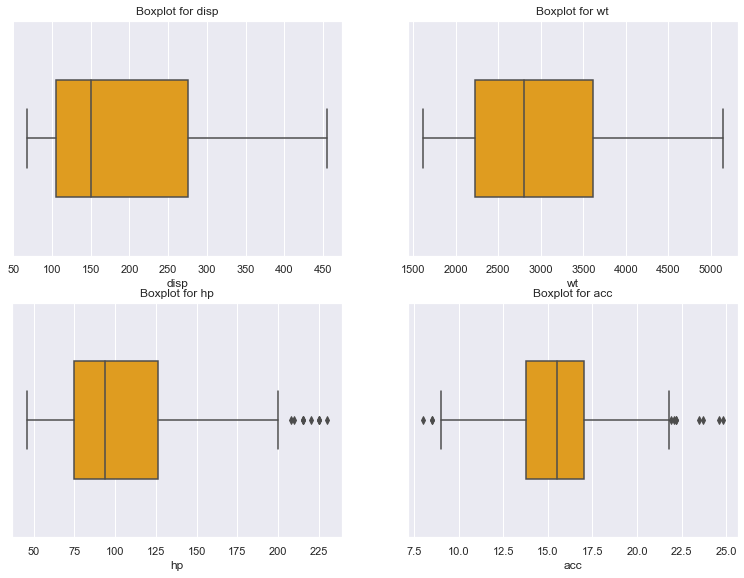

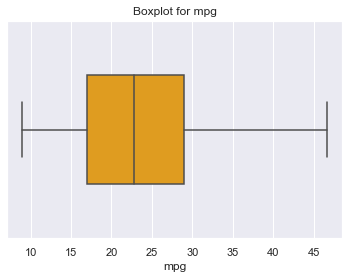

In [34]:
#Visualizing Outliers in dataset using boxplot

print('\n\t\tBoxplot to check the presence of outliers in numeric columns')
print('\t\t==============================================================\n')
fig, ax = plt.subplots(2,2,figsize=(13, 9.5))
for col,subplot in zip(num_columns,ax.flatten()) :
    sns.boxplot(x=car_attr_df[[col]], width=0.5, color='orange', ax=subplot)
    subplot.set_title('Boxplot for {}'.format(col))
    subplot.set_xlabel(col)

plt.show()
sns.boxplot(x=car_attr_df[['mpg']], width=0.5, color='orange')
plt.title('Boxplot for mpg')
plt.xlabel('mpg')
plt.show()

### Observations on outlier analysis of numerical columns:
1. Maximum number of Outliers (11) are present in hp column.
2. acc and mpg have 9 and 1 outliers respectfully.
3. The mean and median are approximately equal for acc and mpg

## Variance in numerical columns

In [35]:
car_attr_df[num_columns].var()

disp     10950.367554
wt      721484.709008
hp        1481.569393
acc          7.611331
mpg         60.918142
dtype: float64

## Visualizing variance of numerical columns through lineplot

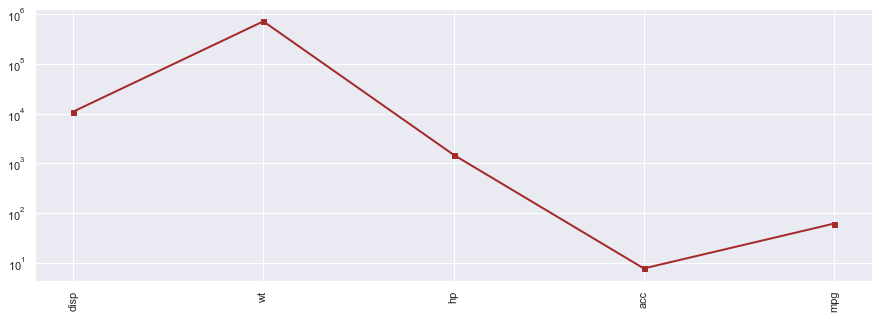

In [36]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)
plt.plot(car_attr_df[num_columns].var(), color='brown', marker='s',linewidth=2, markersize=5)
plt.yscale('log')
plt.show()

### Observations on variance of numerical columns
1. The above line plot shows the variance values for all the numerical feature columns.
2. Variance in all the numerical columns vary exponentially.
3. Variance in acc column is very less with a value of 7.
4. Variance in wt column is very high and in scale of 10^5 and nearly equal to 10^6.
5. Variance in disp column is very high and in scale of 10^4.
6. Variance in hp column is in scale of 10^3 and in mpg column is in scale of 10^2.
6. A high variance indicates that the data points are more spread out around the mean, ie the spread is more and a low variance indicates that the data points are more close to the mean, ie the spread is less.
7. With all the variances varying exponentially, it is suggested to scale the column data using any standadization method for clustering and model building.

# Univariate Analysis

## Visualizing Distribution of numerical columns through distplots

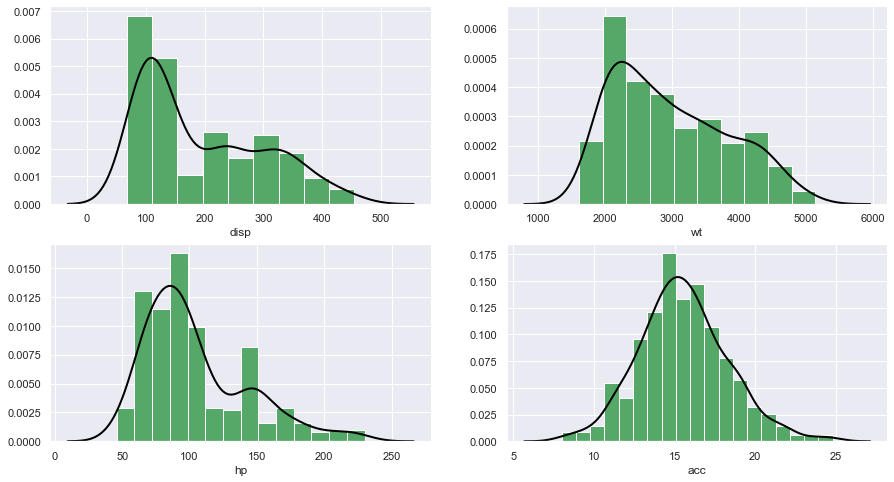

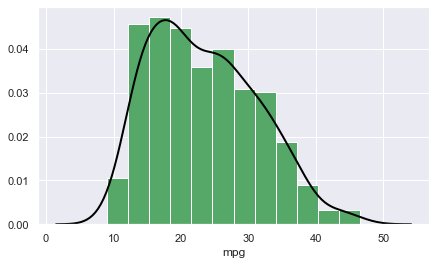

In [37]:
fig, ax = plt.subplots(2,2,figsize=(15, 8))
for col,subplot in zip(num_columns,ax.flatten()) :
    ax =sns.distplot(car_attr_df[col], ax=subplot, hist_kws={'color':'g','alpha':1}, kde_kws={'color':'black', 'lw':2})
plt.show()
plt.figure(figsize=(7,4))
sns.distplot(car_attr_df['mpg'], hist_kws={'color':'g','alpha':1}, kde_kws={'color':'black', 'lw':2})
plt.show()

### Observations on univariate analysis of numerical columns:
1. The distribution for disp and hp columns are more right skewed.
2. The distribution for wt column has lesser skewness on the right than disp and hp.
3. The distribution for acc column is approximately normal.
4. The distribution for mpg is also nearly normal with little skewness on the right side.
5. The distributions for all features is long-tailed indicating that there are many datapoints away from the central values ie, mean and median.

## Visualizing value counts of categorical columns through countplot

In [38]:
car_attr_df.groupby(by = 'cyl').count().T

cyl,3,4,5,6,8
disp,4,199,3,83,103
hp,4,199,3,83,103
wt,4,199,3,83,103
acc,4,199,3,83,103
yr,4,199,3,83,103
mpg,4,199,3,83,103


In [39]:
car_attr_df.groupby(by='yr').count().T

yr,70,71,72,73,74,75,76,77,78,79,80,81,82
cyl,29,27,28,40,26,30,34,28,36,29,27,28,30
disp,29,27,28,40,26,30,34,28,36,29,27,28,30
hp,29,27,28,40,26,30,34,28,36,29,27,28,30
wt,29,27,28,40,26,30,34,28,36,29,27,28,30
acc,29,27,28,40,26,30,34,28,36,29,27,28,30
mpg,29,27,28,40,26,30,34,28,36,29,27,28,30


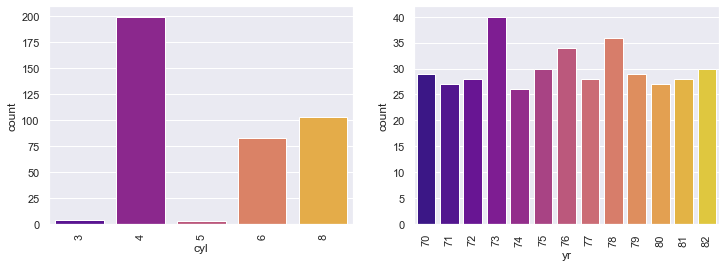

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for col, subplot in zip(cat_columns, ax.flatten()) :
    sns.countplot(car_attr_df[col], ax=subplot,palette = 'plasma')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Observations on univariate analysis of categorical columns:
- Maximum number of cars,51% have 4 cylinders and only 3 cars have 5 cylinders and 4 cars have 3 cylinders.
- A maximum of 40 cars are manufactured in 1973 and minimum of 27 cars are manufactured in 1974
- In the sample taken the no of cars show an approximate normal disribution on the manfacturing year. 

# Bivariate Analysis

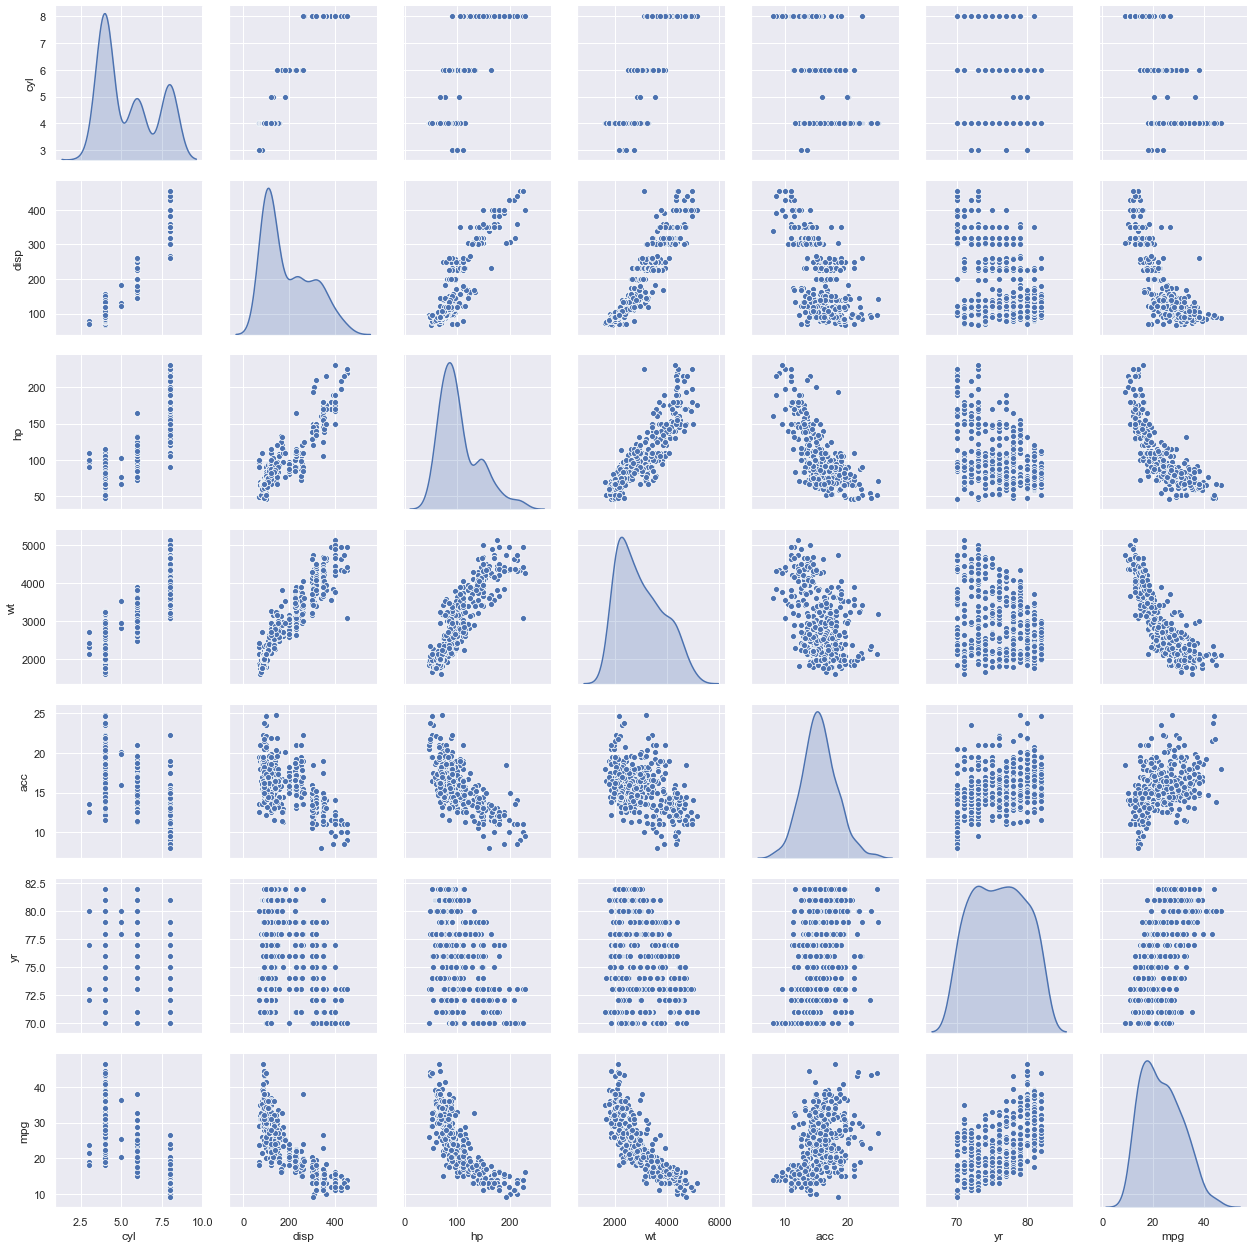

In [41]:
sns.pairplot(car_attr_df,diag_kind='kde')
plt.show()

### Observations on bivariate analysis using pairplot:
- The KDE plots for all features along the diagnol column in the pairplot show either two or three peaks in the Gaussian curves.
- __cyl and disp features clearly show three peaks in their KDE plots.So based on these two features we can say three clusters exist in the data.__
- __hp feature also shows 3 gaussian curve peaks in the KDE plots, but the amount of gaussian curve for the third one is very little which means the third cluster based on this feature would not be significant compared to the other two.__
- __hp, wt, yr and mpg show two peaks in the gaussain curves.So, based on these two features, we can say two clusters exist in the data.__
- The five scatter plots of disp with hp, wt, acc, yr and mpg, show three cluster of datapoints, with the third cluster being smaller in size.This also gives some evidence that three clusters exist.
- The scatter plots of hp with mpg and wt with acc show two cluster of datapoints, which gives some evidence that two clusters exist.
- __Two clusters would be a good point to start identifying and analyzing clusters in the data set followed by analysis for three clusters.__
- disp -- shows positive correlation with hp and wt, and negative correlation with mpg.
	      no good conclusion can be drawn from plots with acc, cyl and yr.
- hp --   shows positive correlation with disp, wt and neagtive correlation with acc, mpg.
          no good conclusion can be drawn from plots with cyl and yr.
- wt --   shows positive correlation with disp and hp and neagtive correlation with mpg.
	      no good conclusion can be drawn from plots with acc, cyl and yr.
- acc --  shows negative correlation with hp.
	      no good conclusion can be drawn from the plots with disp, wt, mpg, cyl and yr.
- mpg --  shows negative correlation with disp, hp, wt.
	      no good conclusion can be drawn from plots with cyl, acc, yr.
- no conclusions canbe drawn from plots of cyl and yr with all other variables.
- The pairplot suggests that mpg of cars is dependent more on disp, hp and wt of the cars.

## Correlation between numerical columns

In [42]:
corr = car_attr_df.corr()
corr.style.background_gradient(cmap='YlGnBu')

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618
disp,0.950823,1,0.897257,0.932994,-0.5438,-0.369855,-0.805127
hp,0.842983,0.897257,1,0.864538,-0.689196,-0.416361,-0.778427
wt,0.897527,0.932994,0.864538,1,-0.416839,-0.30912,-0.832244
acc,-0.504683,-0.5438,-0.689196,-0.416839,1,0.290316,0.423329
yr,-0.345647,-0.369855,-0.416361,-0.30912,0.290316,1,0.580541
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1


## Visualizing Correlation between numerical columns through Heat map

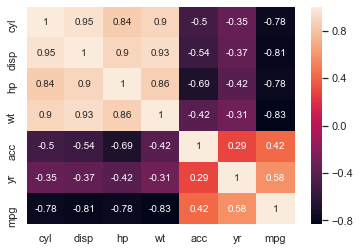

In [43]:
sns.heatmap(corr, annot=True)
plt.show()

### Observations on Correlation between numerical columns:
- cyl and disp variables have the strongest correlation of 0.95
- disp and wt have a strong correlation of 0.93
- The variables cyl and wt, disp and hp also have a strong correlation of 0.9
- The variables cyl and hp, hp and wt show a moderate to strong correlation of 0.84 and 0.86
- acc has a moderate negative correlation of -0.69 with hp.It shows weak correlation with all other variables
- mpg has moderate negative correlation of -0.78, -0.81, -0.78, -0.83 with cyl, disp, hp, wt
- yr has a weak correlation with all other variables

# Identifying and Analysing Clusters using K Means Clustering

#### Since most of the features in the dataset are continuous and there is no hierachy present between the features of the dataset K Means Clustering  is a preferred technique to use for identifying and analysing the clusters in the database.

### Standardize the dataset

In [44]:
#Use Z-Score standardization to standardize the features in the datset.

In [45]:
car_attr_df_z = car_attr_df.apply(zscore)

In [46]:
car_attr_df_z.shape

(392, 7)

In [47]:
car_attr_df_z.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925


In [48]:
car_attr_df_z.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [49]:
car_attr_df_z.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,392.0,-1.699321e-16,1.001278,-1.451004,-0.864014,-0.864014,1.483947,1.483947
disp,392.0,-2.537653e-16,1.001278,-1.209563,-0.855532,-0.415384,0.778276,2.493416
hp,392.0,-4.392745e-16,1.001278,-1.520975,-0.766593,-0.285349,0.560080,3.265452
wt,392.0,5.607759e-17,1.001278,-1.608575,-0.886854,-0.205211,0.751093,2.549061
acc,392.0,6.117555e-16,1.001278,-2.736983,-0.641055,-0.014999,0.538471,3.360262
yr,392.0,-9.754102e-16,1.001278,-1.625315,-0.809884,0.005547,0.820978,1.636410
mpg,392.0,-1.840931e-16,1.001278,-1.853218,-0.826925,-0.089277,0.712514,2.970359


In [50]:
### Find optimal number of clusters in the dataset.

In [51]:
no_of_clusters = range(1,10)
meanDistortions = []

for k in no_of_clusters :
    clsmodel = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    clsmodel.fit(car_attr_df_z)
    predictions = clsmodel.predict(car_attr_df_z)
    distortions = sum(np.min(cdist(car_attr_df_z, clsmodel.cluster_centers_, 'euclidean'), axis=1))
    meanDist = distortions/car_attr_df_z.shape[0]
    meanDistortions.append(meanDist)

In [52]:
meanDistortions

[2.4599540277021017,
 1.6934623956814503,
 1.4306047581142727,
 1.2510807241951143,
 1.1915994541434949,
 1.1349230289508212,
 1.0792942932073564,
 1.0305794517537852,
 1.0090289886463533]

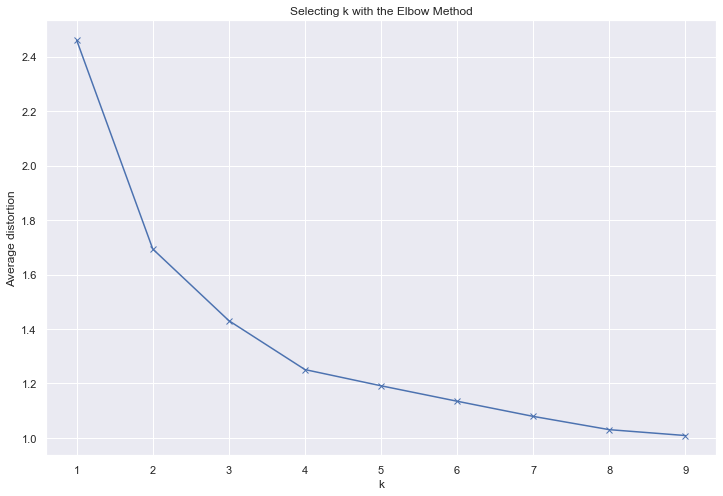

In [53]:
plt.figure(figsize=(12,8))
plt.plot(no_of_clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

### Interpret and determine optimal k value using Elbow method
- The bend in the Elbow curve is significant at k=2.Also there is a steep decrease in average distortion from k=1(2.45) to k=2(1.69).With this evidence we can say two clusters exist in the dataset.
- Also, slight bends can be observed at k=3 and k=4, but the decrease average distortions (1.69 to 1.43 at k=3 and 1.43 to 1.25 at k=4), is not very significant.
- The possible number of clusters could be either 2, 3 or 4 depending on the inertia within the clusters and inertia between the clusters.
- We will analyze the clusters formed for k=2, k=3 and k=4 to conclude the optimal number of clusters which can be formed.

### Identify and Analyze the clusters formed for k=2

In [54]:
clsmodel_2 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300)
clsmodel_2.fit(car_attr_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
predictions_2 = clsmodel_2.predict(car_attr_df_z)

In [56]:
predictions_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
car_attr_df_z['GROUP_K_2'] = predictions_2

In [58]:
#car_attr_df_z

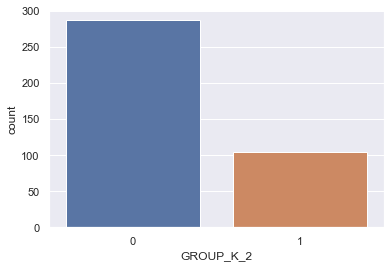

In [59]:
ax = sns.countplot('GROUP_K_2', data=car_attr_df_z)

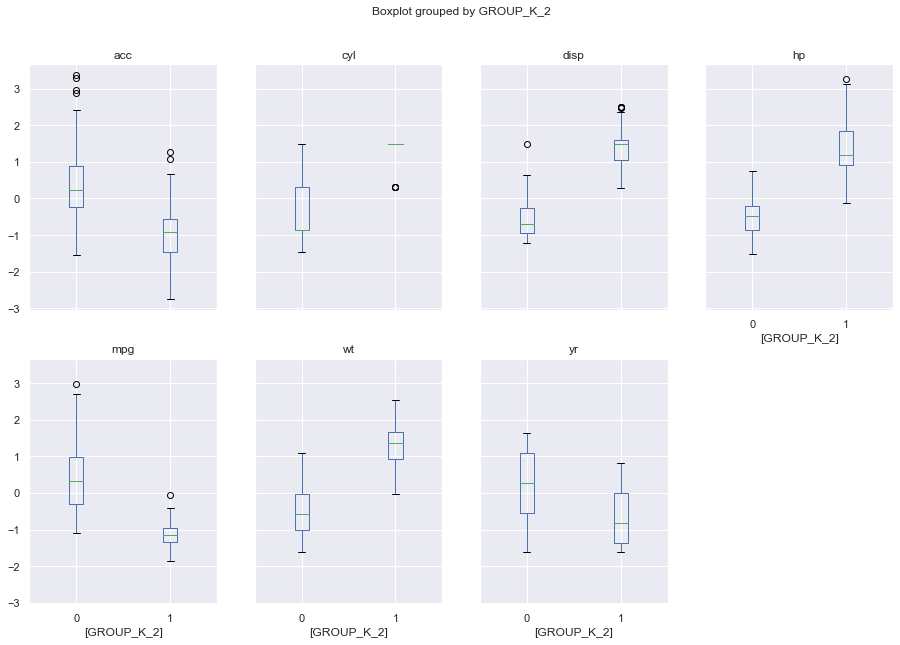

In [60]:
ax = car_attr_df_z.boxplot(by='GROUP_K_2', figsize=(15,10), layout=(2,4))

#### Observations from cluster analysis with k=2
- Box plot for for all the features except cyl, clearly distinguishes, the clusters 0 and 1.
- The central values mean and median for both the clusters are are very different from each other.
- The elongated tail after q3 for cluster 0 in mpg, suggests the possible formation of a third cluster.
- Box plot for cyl indicates that almost all datapoints are clustering over cluster 0.
- The number of outliers are more in box plot for acc, but there are no outliers seen for wt and yr.
- Overall, the no of outliers ar less when we are forming two clusters in the dataset.

### Identify and Analyze the clusters formed when k=3

In [61]:
clsmodel_3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
clsmodel_3.fit(car_attr_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
predictions_3 = clsmodel_3.predict(car_attr_df_z)

In [63]:
predictions_3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0,

In [64]:
car_attr_df_z['GROUP_K_3'] = predictions_3

In [65]:
#car_attr_df_z

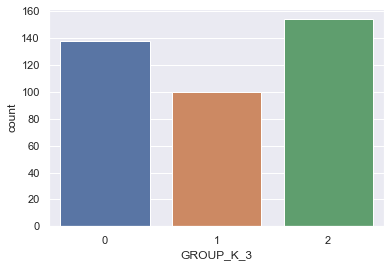

In [66]:
ax = sns.countplot('GROUP_K_3', data=car_attr_df_z)

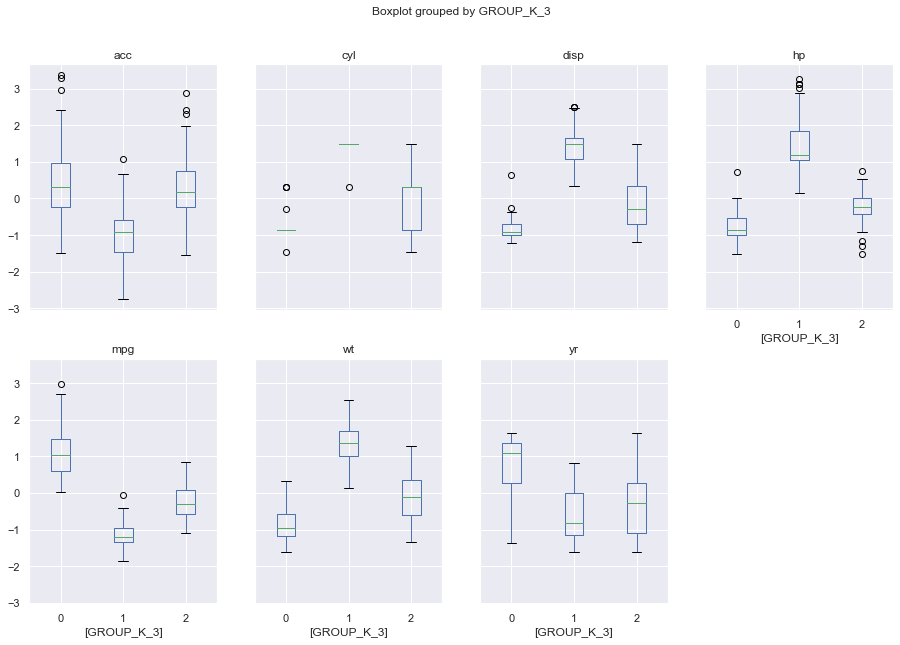

In [67]:
ax = car_attr_df_z.drop('GROUP_K_2',axis=1).boxplot(by='GROUP_K_3', figsize=(15,10), layout=(2,4))

#### Observations from cluster analysis with k=3
- Box plot for for all the features show that the third cluster formed is almost an ovelap of the second cluster.
- The central values mean and median for the three clusters are are very different from each other.
- The elongated tail after q3 for cluster 0 when K=2 has reduced for K=3 and resulted in the formation of a third cluster.
- Box plot for cyl indicates that almost all datapoints are clustering over cluster 2.
- The number of outliers has increased compared to k=2.
- Overall, the no of outliers ar more when we are forming three clusters in the dataset.

### Identify and Analyze the clusters formed when k=4

In [68]:
clsmodel_4 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)
clsmodel_4.fit(car_attr_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
predictions_4 = clsmodel_4.predict(car_attr_df_z)

In [70]:
predictions_4

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 3, 1, 1, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 0, 3, 3, 3, 2, 3, 3, 2, 1, 1, 1, 0, 3, 0, 3, 1,
       1, 1, 2, 2, 2, 2, 2, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 3, 1, 3, 3, 0, 3, 1, 0, 1, 3,
       3, 3, 3, 0, 0, 0, 3, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 3, 3, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 0, 3, 0, 0, 0, 0, 1, 3, 3,
       0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       0, 0, 0, 0, 3, 3, 3, 0, 1, 1, 3, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [71]:
car_attr_df_z['GROUP_K_4'] = predictions_4

In [72]:
#car_attr_df_z

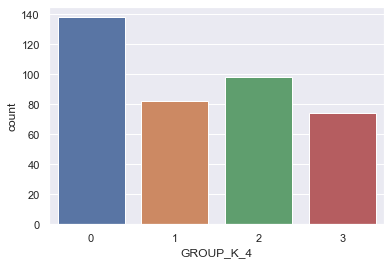

In [73]:
ax = sns.countplot('GROUP_K_4', data=car_attr_df_z)

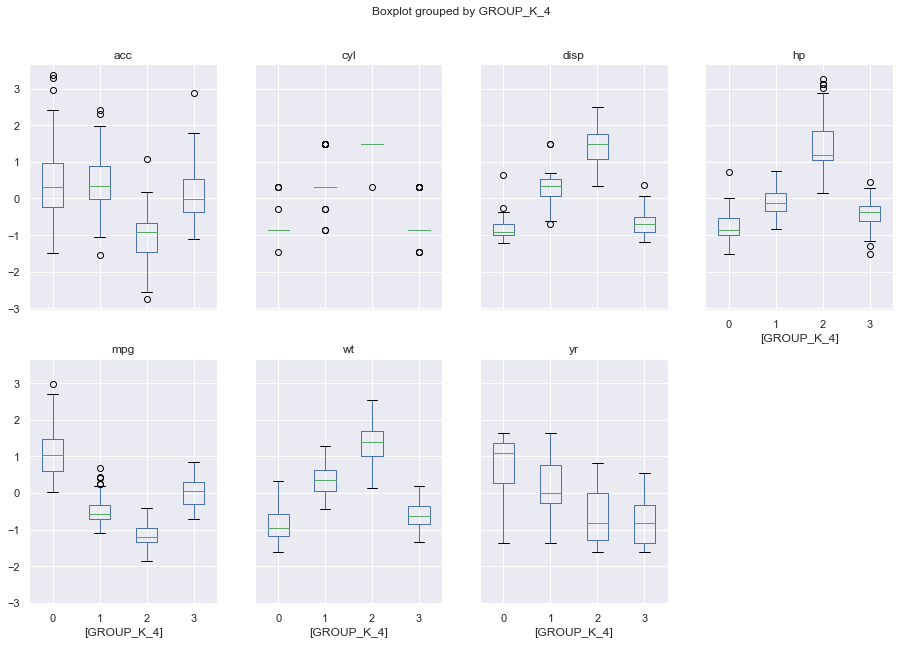

In [74]:
ax = car_attr_df_z.drop(['GROUP_K_2','GROUP_K_3'],axis=1).boxplot(by='GROUP_K_4', figsize=(15,10), layout=(2,4))

#### Observations from cluster analysis with k=4
- The number of clusters formed are very similar to each other.
- Atleast two clusters are completely overlappingin all the box plots.
- The box plot for cyl throws more datapoints as outliers and the clusters are  not identified properly.
- We can conclude that k=4 is not an optimal value for the number of clusters in the dataset.

## From the Cluster analysis on the dataset with k=2, k=3 and k=4, we can conclude that k=2 is the optimal value of k and so, two clusters exist in the given dataset.

# Implementing Linear Regression model on the two clusters, Cluster 0 and Cluster 1 identified for k=2

### Separate the two clusters identified using K Means clustering for a k value of 2.

In [75]:
#Add GROUP_K_2 columns which has two clusters ...cluster0 and cluster1 to the original dataframe

car_attr_df['GROUP'] = car_attr_df_z['GROUP_K_2']

In [76]:
#Create a dataframe for Cluster 0

car_attr_df_grp0 = car_attr_df[car_attr_df['GROUP'] == 0]

In [77]:
#Reset the indices of dataframe with Cluster 0

car_attr_df_grp0.reset_index(drop=True, inplace=True)

In [78]:
#Create a dataframe for Cluster 1

car_attr_df_grp1 = car_attr_df[car_attr_df['GROUP'] == 1]

In [79]:
#Reset the indices of dataframe with Cluster 1

car_attr_df_grp1.reset_index(drop=True, inplace=True)

In [80]:
# Check value counts in both dataframes.These counts should give number of Cluster0 and CLuster1 datapoints.

print("\nNumber of Cluster 0 datapoints:\n {}\n".format(car_attr_df_grp0['GROUP'].value_counts()))
print("Number of Cluster 1 datapoints:\n {}\n".format(car_attr_df_grp1['GROUP'].value_counts()))


Number of Cluster 0 datapoints:
 0    287
Name: GROUP, dtype: int64

Number of Cluster 1 datapoints:
 1    105
Name: GROUP, dtype: int64



In [81]:
#Check shape of both dataframes

print('Shape of Group 0 : {}\nShape of Group 1 : {}'.format(car_attr_df_grp0.shape, car_attr_df_grp1.shape))

Shape of Group 0 : (287, 8)
Shape of Group 1 : (105, 8)


In [82]:
#DataFrame to store Model Coefficients and Performance metrics for Cluster 0 and Cluster 1


compare_coefficients_df = pd.DataFrame(index=('Cluster 0', 'Cluster 1'), 
                                  columns=('cyl', 'disp', 'hp', 
                                           'wt', 'acc', 'yr', 'intercept_'))

compare_metrics_df = pd.DataFrame(index=('Cluster 0', 'Cluster 1'), 
                                  columns=('trainR^2', 'testR^2', 'trainMSE', 'testMSE',
                                           'trainRMSE', 'testRMSE', 'trainRMSEpct', 'testRMSEpct'))                                

In [83]:
#Rename index

compare_metrics_df.index.name = 'Clusters k=2'
compare_coefficients_df.index.name = 'Clusters k=2'

### Build Linear Regression model for the first cluster - Cluster 0, identified in the dataset when k=2.

In [84]:
#First cluster is GROUP 0

car_attr_df_grp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 8 columns):
cyl      287 non-null int64
disp     287 non-null float64
hp       287 non-null float64
wt       287 non-null int64
acc      287 non-null float64
yr       287 non-null int64
mpg      287 non-null float64
GROUP    287 non-null int32
dtypes: float64(4), int32(1), int64(3)
memory usage: 16.9 KB


### Create the X(Feature-set) and Y(Target-set) sets for the given dataset.

In [85]:
#mpg is Target or response variable and remaining features excluding GROUP are predictor variables.

X = car_attr_df_grp0.drop(['mpg','GROUP'],axis=1)
y = car_attr_df_grp0['mpg']

In [86]:
#Shape of Feature-set and Target-set

print('Shape of Feture-set : ', X.shape)
print('Shape of Target-set : ', y.shape)

Shape of Feture-set :  (287, 6)
Shape of Target-set :  (287,)


### Split the data as train set and test set with a ratio of 70:30

In [87]:
#Split the dataset into training and test set using train_test_split() function

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.30, random_state=7)

In [88]:
#print shapes of training and test sets

print("Training Set Shape:\nFeatures : {0}  Target : {1}\n".format(X_train.shape, y_train.shape))
print("Test Set Shape:\nFeatures : {0}  Target : {1}".format(X_test.shape, y_test.shape))

Training Set Shape:
Features : (200, 6)  Target : (200,)

Test Set Shape:
Features : (87, 6)  Target : (87,)


In [89]:
#Implementing Linear Regression model

linreg = LinearRegression()

In [90]:
#Fit the model to the training set

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
#Predict classes using the built model

yhat = linreg.predict(X_test)

### model coefficients (slope and intercept).

In [92]:
print("The Model Coefficients coef_ or slope of predictor variables:")
print("============================================================")

for col, coef in zip(X.columns, linreg.coef_):
    compare_coefficients_df.loc['Cluster 0',col] = round(coef, 3)
    print("\t",col,'\t', round(coef, 3))
#print(linreg.coef_)

The Model Coefficients coef_ or slope of predictor variables:
	 cyl 	 1.174
	 disp 	 -0.031
	 hp 	 -0.094
	 wt 	 -0.006
	 acc 	 -0.083
	 yr 	 0.831


In [93]:
print("The Model Coefficient intercept_ or y-intercept:")
print("================================================")

compare_coefficients_df.loc['Cluster 0','intercept_'] = round(linreg.intercept_, 3)
print("\t",round(linreg.intercept_, 3))

The Model Coefficient intercept_ or y-intercept:
	 -14.531


### Visualize Linear Relationship between Predictors(Features) and Response(Target) using regplot

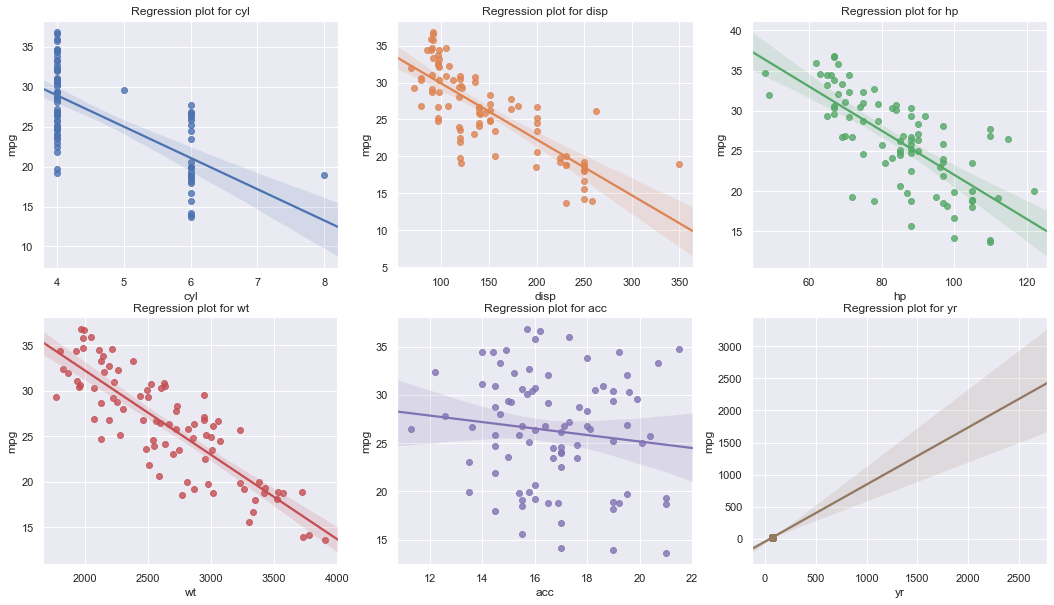

In [94]:
fig, ax = plt.subplots(2,3,figsize=(18, 10))
for col,subplot in zip(X_test.columns,ax.flatten()) :
    sns.regplot(X_test[col], yhat, ax=subplot)
    subplot.set_title('Regression plot for {}'.format(col))
    subplot.set_ylabel('mpg')
plt.show()

#sns.regplot(X_test['yr'], yhat)
#plt.figure(figsize=(10,5))
#plt.title('Boxplot for mpg')
#plt.xlabel('mpg')
#plt.show()

### Calculate the metrics R^2, MSE, RMSE and RMSE percent for train and test data

In [95]:
# Model accuracy score or R^2 using score() function on Training data set

trainRsquare = linreg.score(X_train, y_train)
compare_metrics_df.loc['Cluster 0','trainR^2'] = round(trainRsquare, 3)
print('R^2 for training-set = ', round(trainRsquare, 3))

R^2 for training-set =  0.773


In [96]:
# Mean Square error (MSE) of Train datset

trainMSE = mean_squared_error(y_train, linreg.predict(X_train))
compare_metrics_df.loc['Cluster 0','trainMSE'] = round(trainMSE, 3)
print('MSE for training-set = ', round(trainMSE, 3))

MSE for training-set =  10.301


In [97]:
# Root Mean Square error (RMSE) of Train datset

trainRMSE = np.sqrt(trainMSE)
compare_metrics_df.loc['Cluster 0','trainRMSE'] = round(trainRMSE, 3)
print('RMSE for training-set = ', round(trainRMSE, 3))

RMSE for training-set =  3.21


In [98]:
# Root Mean Square error Percent (RMSE%) of Train datset

trainRMSEpct  = trainRMSE/np.mean(y_train) * 100
compare_metrics_df.loc['Cluster 0','trainRMSEpct'] = round(trainRMSEpct, 3)
print('RMSEpercent for training-set = ', round(trainRMSEpct, 3))

RMSEpercent for training-set =  12.049


In [99]:
# Model accuracy score using score() function on Test data set

testRsquare = linreg.score(X_test, y_test)
compare_metrics_df.loc['Cluster 0','testR^2'] = round(testRsquare, 3)
print('R^2 for test-set = ', round(testRsquare, 3))

R^2 for test-set =  0.746


In [100]:
# Mean Square error (MSE) of Test datset

testMSE = mean_squared_error(y_test, linreg.predict(X_test))
compare_metrics_df.loc['Cluster 0','testMSE'] = round(testMSE, 3)
print('MSE for test-set = ', round(testMSE, 3))

MSE for test-set =  10.213


In [101]:
# Root Mean Square error (RMSE) of Test datset

testRMSE = np.sqrt(testMSE)
compare_metrics_df.loc['Cluster 0','testRMSE'] = round(testRMSE, 3)
print('RMSE for test-set = ', round(testRMSE, 3))

RMSE for test-set =  3.196


In [102]:
# Root Mean Square error Percent (RMSE%) of Train datset

testRMSEpct  = testRMSE/np.mean(y_test) * 100
compare_metrics_df.loc['Cluster 0','testRMSEpct'] = round(testRMSEpct, 3)
print('RMSEpercent for test-set = ', round(testRMSEpct, 3))

RMSEpercent for test-set =  12.068


### Build Linear Regression model for the second cluster - Cluster 1, identified in the dataset when k=2.

In [103]:
#First cluster is GROUP 0

car_attr_df_grp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
cyl      105 non-null int64
disp     105 non-null float64
hp       105 non-null float64
wt       105 non-null int64
acc      105 non-null float64
yr       105 non-null int64
mpg      105 non-null float64
GROUP    105 non-null int32
dtypes: float64(4), int32(1), int64(3)
memory usage: 6.2 KB


### Create the X(Feature-set) and Y(Target-set) sets for the given dataset.

In [104]:
#mpg is Target or response variable and remaining features excluding GROUP are predictor variables.

X1 = car_attr_df_grp1.drop(['mpg','GROUP'],axis=1)
y1 = car_attr_df_grp1['mpg']

In [105]:
#Shape of Feature-set and Target-set

print('Shape of Feture-set : ', X1.shape)
print('Shape of Target-set : ', y1.shape)

Shape of Feture-set :  (105, 6)
Shape of Target-set :  (105,)


### Split the data as train set and test set with a ratio of 70:30

In [106]:
#Split the dataset into training and test set using train_test_split() function

(X1_train, X1_test, y1_train, y1_test) = train_test_split(X1, y1, test_size=0.30, random_state=7)

In [107]:
#print shapes of training and test sets

print("Training Set Shape:\nFeatures : {0}  Target : {1}\n".format(X1_train.shape, y1_train.shape))
print("Test Set Shape:\nFeatures : {0}  Target : {1}".format(X1_test.shape, y1_test.shape))

Training Set Shape:
Features : (73, 6)  Target : (73,)

Test Set Shape:
Features : (32, 6)  Target : (32,)


In [108]:
#Implementing Linear Regression model

linreg1 = LinearRegression()

In [109]:
#Fit the model to the training set

linreg1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
#Predict classes using the built model

yhat1 = linreg1.predict(X1_test)

### model coefficients (slope and intercept).

In [111]:
print("The Model Coefficients coef_ or slope of predictor variables:")
print("============================================================")

for col, coef in zip(X1.columns, linreg1.coef_):
    compare_coefficients_df.loc['Cluster 1',col] = round(coef, 3)
    print("\t",col,'\t', round(coef, 3))
#print(linreg1.coef_)

The Model Coefficients coef_ or slope of predictor variables:
	 cyl 	 -0.321
	 disp 	 0.002
	 hp 	 -0.027
	 wt 	 -0.002
	 acc 	 -0.294
	 yr 	 0.359


In [112]:
print("The Model Coefficient intercept_ or y-intercept:")
print("================================================")

compare_coefficients_df.loc['Cluster 1','intercept_'] = round(linreg1.intercept_, 3)
print("\t",round(linreg1.intercept_, 3))
#print(linreg1.intercept_)

The Model Coefficient intercept_ or y-intercept:
	 7.604


### Visualize Linear Relationship between Predictors(Features) and Response(Target) using regplot

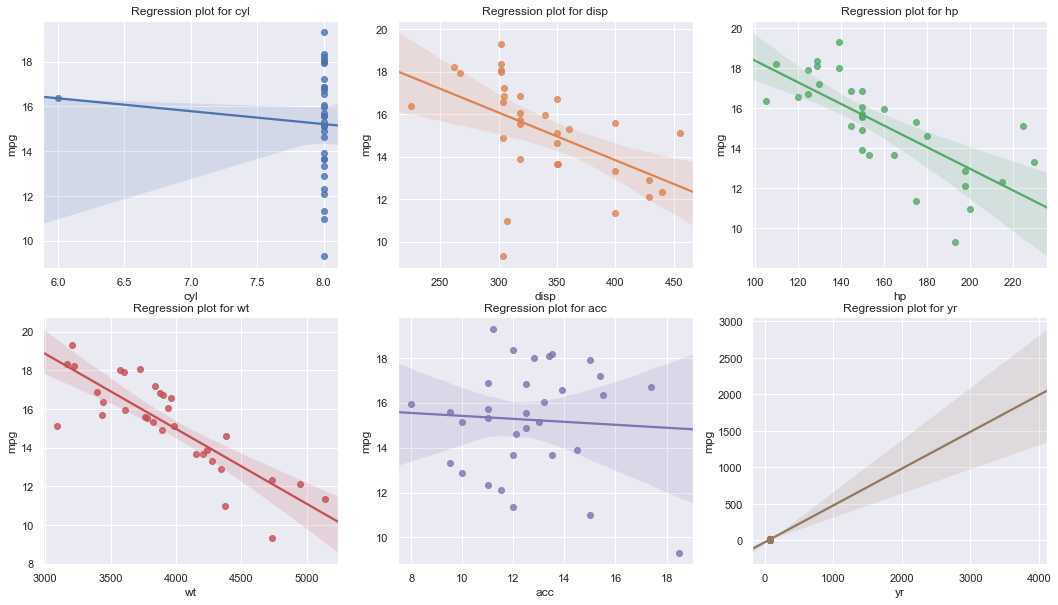

In [113]:
fig, ax = plt.subplots(2,3,figsize=(18, 10))
for col,subplot in zip(X1_test.columns,ax.flatten()) :
    sns.regplot(X1_test[col], yhat1, ax=subplot)
    subplot.set_title('Regression plot for {}'.format(col))
    subplot.set_ylabel('mpg')
plt.show()

#sns.regplot(X1_test['yr'], yhat)
#plt.figure(figsize=(10,5))
#plt.title('Boxplot for mpg')
#plt.xlabel('mpg')
#plt.show()

### Calculate the metrics R^2, MSE, RMSE and RMSE percent for train and test data

In [114]:
# Model accuracy score or R^2 using score() function on Training data set

trainRsquare1 = linreg1.score(X1_train, y1_train)
compare_metrics_df.loc['Cluster 1','trainR^2'] = round(trainRsquare1, 3)
print('R^2 for training-set = ', round(trainRsquare1, 3))

R^2 for training-set =  0.646


In [115]:
# Mean Square error (MSE) of Train datset

trainMSE1 = mean_squared_error(y1_train, linreg1.predict(X1_train))
compare_metrics_df.loc['Cluster 1','trainMSE'] = round(trainMSE1, 3)
print('MSE for training-set = ', round(trainMSE1, 3))

MSE for training-set =  1.685


In [116]:
# Root Mean Square error (RMSE) of Train datset

trainRMSE1 = np.sqrt(trainMSE1)
compare_metrics_df.loc['Cluster 1','trainRMSE'] = round(trainRMSE1, 3)
print('RMSE for training-set = ', round(trainRMSE1, 3))

RMSE for training-set =  1.298


In [117]:
# Root Mean Square error Percent (RMSE%) of Train datset

trainRMSEpct1  = trainRMSE1/np.mean(y1_train) * 100
compare_metrics_df.loc['Cluster 1','trainRMSEpct'] = round(trainRMSEpct1, 3)
print('RMSEpercent for training-set = ', round(trainRMSEpct1, 3))

RMSEpercent for training-set =  8.849


In [118]:
# Model accuracy score using score() function on Test data set

testRsquare1 = linreg1.score(X1_test, y1_test)
compare_metrics_df.loc['Cluster 1','testR^2'] = round(testRsquare1, 3)
print('R^2 for test-set = ', round(testRsquare1, 3))

R^2 for test-set =  0.502


In [119]:
# Mean Square error (MSE) of Test datset

testMSE1 = mean_squared_error(y1_test, linreg1.predict(X1_test))
compare_metrics_df.loc['Cluster 1','testMSE'] = round(testMSE1, 3)
print('MSE for test-set = ', round(testMSE1, 3))

MSE for test-set =  4.206


In [120]:
# Root Mean Square error (RMSE) of Test datset

testRMSE1 = np.sqrt(testMSE1)
compare_metrics_df.loc['Cluster 1','testRMSE'] = round(testRMSE1, 3)
print('RMSE for test-set = ', round(testRMSE1, 3))

RMSE for test-set =  2.051


In [121]:
# Root Mean Square error Percent (RMSE%) of Train datset
testRMSEpct1  = testRMSE1/np.mean(y1_test) * 100
compare_metrics_df.loc['Cluster 1','testRMSEpct'] = round(testRMSEpct1, 3)
print('RMSEpercent for test-set = ', round(testRMSEpct1, 3))

RMSEpercent for test-set =  13.432


## Summary of Model Coefficients and Performance Metrics of Linear Regressin models for Cluster 0 and Cluster 1 in the datset

In [122]:
compare_coefficients_df

,cyl,disp,hp,wt,acc,yr,intercept_
Clusters k=2,,,,,,,
Cluster 0,1.174,-0.031,-0.094,-0.006,-0.083,0.831,-14.531
Cluster 1,-0.321,0.002,-0.027,-0.002,-0.294,0.359,7.604


In [123]:
compare_metrics_df

,trainR^2,testR^2,trainMSE,testMSE,trainRMSE,testRMSE,trainRMSEpct,testRMSEpct
Clusters k=2,,,,,,,,
Cluster 0,0.773,0.746,10.301,10.213,3.21,3.196,12.049,12.068
Cluster 1,0.646,0.502,1.685,4.206,1.298,2.051,8.849,13.432


> In cluster 0, 77.3% of variablility in mpg in train data and 74.6% of variability in test data can be explained with this model.
> In cluster 1, 64.6% of variablility in mpg in train data and 50.2% of variability in test data can be explained with this model.